In [1]:
import os

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils import data as Data
from torchvision import transforms, datasets
%matplotlib inline

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

mnist_train = datasets.FashionMNIST(root='dataset/Fashion_Minist', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.FashionMNIST(root='dataset/Fashion_Minist', train=False, download=True, transform=transforms.ToTensor())

ModuleNotFoundError: No module named 'torch.nn'

In [4]:
print(len(mnist_train), len(mnist_test))
print(mnist_train[0][0].size())

60000 10000
torch.Size([1, 28, 28])


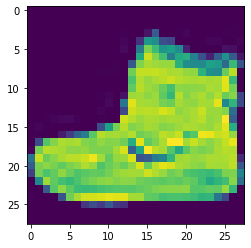

In [6]:
plt.figure(1)
plt.imshow(mnist_train[0][0].view(28,28).numpy())

In [7]:
def get_type(labels):
    types = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
             'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [types[int(i)] for i in labels]
get_type([0,1,2,3])

['t-shirt', 'trouser', 'pullover', 'dress']

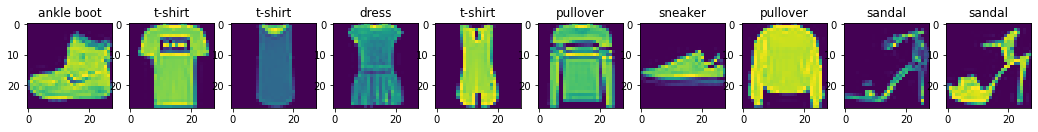

In [30]:
def display_images(imgs, labels):
    fig, ax = plt.subplots(1, len(imgs), figsize=(18, 20))
    types = get_type(labels)
    for i in range(len(imgs)):
        ax[i].imshow(imgs[i])
        ax[i].set_title(types[i])

imgs = [mnist_train[i][0].view(28, 28) for i in range(10)]
labels = [mnist_train[i][1] for i in range(10)]
display_images(imgs, labels)

In [9]:
BATCH_SIZE = 256
train_iter = Data.DataLoader(dataset=mnist_train, batch_size=BATCH_SIZE, shuffle=True)
test_iter = Data.DataLoader(dataset=mnist_test, batch_size=BATCH_SIZE, shuffle=False)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [21]:

class Softmax(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(28 * 28, 10)

    def forward(self, img):
        out = self.layer(img)
        return out


net1 = Softmax()
net1.to(device)
print(net1)

Softmax(
  (layer): Linear(in_features=784, out_features=10, bias=True)
)


### 定义损失函数和优化器

In [24]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net1.parameters(), lr=0.01)
torch.nn.init.normal_(net1.layer.weight, mean=0.0, std=0.01)
torch.nn.init.constant_(net1.layer.bias, val=0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       requires_grad=True)

In [25]:
EPOCH_NUM,loss_history=20,[]
for epoch in range(EPOCH_NUM):
    epoch_loss = 0
    for batch_imgs, batch_labels in train_iter:
        batch_imgs = batch_imgs.to(device)
        batch_labels = batch_labels.to(device)
        out = net1(batch_imgs.view(batch_imgs.shape[0], -1))

        step_loss = loss(out, batch_labels)
        epoch_loss += step_loss

        optimizer.zero_grad()
        step_loss.backward()
        optimizer.step()
    loss_history.append(epoch_loss)
    print(f'{epoch=};{epoch_loss=}')


epoch=0;epoch_loss=tensor(320.3551, device='cuda:0', grad_fn=<AddBackward0>)
epoch=1;epoch_loss=tensor(215.0958, device='cuda:0', grad_fn=<AddBackward0>)
epoch=2;epoch_loss=tensor(188.6219, device='cuda:0', grad_fn=<AddBackward0>)
epoch=3;epoch_loss=tensor(174.4716, device='cuda:0', grad_fn=<AddBackward0>)
epoch=4;epoch_loss=tensor(165.1679, device='cuda:0', grad_fn=<AddBackward0>)
epoch=5;epoch_loss=tensor(158.3725, device='cuda:0', grad_fn=<AddBackward0>)
epoch=6;epoch_loss=tensor(153.2613, device='cuda:0', grad_fn=<AddBackward0>)
epoch=7;epoch_loss=tensor(149.0083, device='cuda:0', grad_fn=<AddBackward0>)
epoch=8;epoch_loss=tensor(145.5307, device='cuda:0', grad_fn=<AddBackward0>)
epoch=9;epoch_loss=tensor(142.5043, device='cuda:0', grad_fn=<AddBackward0>)
epoch=10;epoch_loss=tensor(139.9339, device='cuda:0', grad_fn=<AddBackward0>)
epoch=11;epoch_loss=tensor(137.7694, device='cuda:0', grad_fn=<AddBackward0>)
epoch=12;epoch_loss=tensor(135.7940, device='cuda:0', grad_fn=<AddBackward

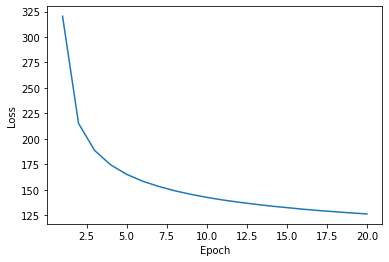

In [29]:
import numpy as np
fig, ax = plt.subplots()
ax.plot(np.arange(EPOCH_NUM) + 1, loss_history)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss');

In [28]:
acc = 0
for batch_imgs, batch_labels in test_iter:
    batch_imgs = batch_imgs.to(device)
    batch_labels = batch_labels.to(device)
    out = net1(batch_imgs.view(batch_imgs.shape[0], -1))
    out = out.argmax(axis=1)
    acc += (out == batch_labels).sum().item()
acc=acc/len(mnist_test)
print(acc)


0.8127
